# 5. QLS - Plotting Data

## Graphical Representations of Data

Representing data graphically can be useful for learning how data behaves and seeing potential structures or flaws. But, we need to be extremely careful with this! As humans, we are incredibly good at seeing ONLY evidence which confirms our beliefs, and visual data tends to do that. Plots are good to use when formulating a hypothesis, but not testing one.

We will go over some common plots.

In [1]:
import seaborn as sb
import yfinance as yf

### Getting Some Data

If we're going to plot something, we need data. We'll get the pricing for AAPL and MSFT to use.

#### Data Structures

Knowing the structure of data is very important. In this case the data will be returned as a pandas `DataFrame` object. The rows are timestamps and the columns are the two assets, APPL and MSFT.

In [2]:
start_date = "2014-01-01"
end_date = "2015-01-01"
data = yf.download(["AAPL", "MSFT"], start_date, end_date)
data = data["Adj Close"]
data.head()

[*********************100%***********************]  2 of 2 completed


,AAPL,MSFT
Date,,
2014-01-02,17.364965,31.420710
2014-01-03,16.983524,31.209318
2014-01-06,17.076145,30.549797
2014-01-07,16.954014,30.786547
2014-01-08,17.061382,30.236940


We can now index into the 2D `DataFrame` and get a 1D `Series`. This is similar to an array but instead of integer indices it's times.

In [3]:
data["MSFT"].head()

Date
2014-01-02    31.420710
2014-01-03    31.209318
2014-01-06    30.549797
2014-01-07    30.786547
2014-01-08    30.236940
Name: MSFT, dtype: float64

### Histogram

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, we can see where most values are clustered. The height represents the number of values per bar.

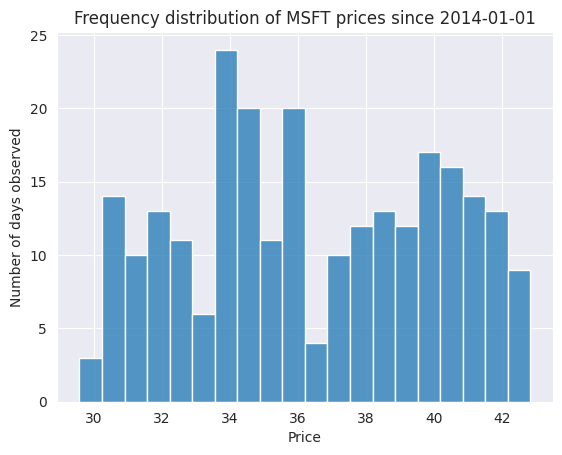

In [4]:
sb.histplot(data['MSFT'], bins=20).set(title=f"Frequency distribution of MSFT prices since {start_date}", xlabel="Price", ylabel="Number of days observed");

#### Returns Histogram

In finance, we don't need to look at the distribution of prices that much. They're non-stationary, so we can't compare them very well against other assets. Instead, we use daily returns.

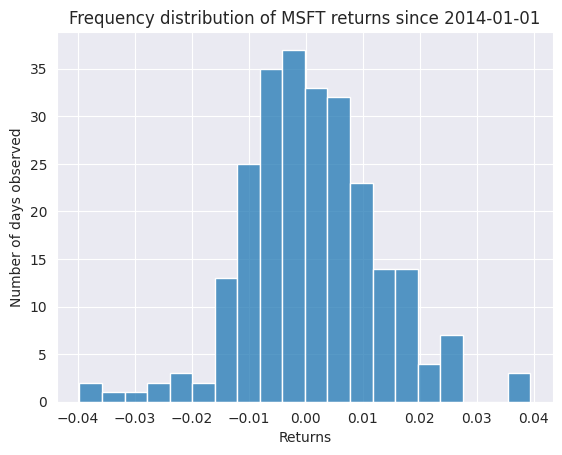

In [5]:
# remove the first element, since percent change from nothing is NaN
R = data['MSFT'].pct_change()[1:]

# plot a histogram using 20 bins
sb.histplot(R, bins=20).set(title=f"Frequency distribution of MSFT returns since {start_date}", xlabel="Returns", ylabel="Number of days observed");

The graph above shows that the daily returns were above 0.03 on fewer than 5 days in 2014
**This doesn't imply that future returns will have the same distribution.**

#### Cumulative Histogram (Discrete Estimated CDF)

In here, the height of a bar shows the number of observations in the bin. It's always non-decreasing since you can't get negative observations. The choice of graph depends on what we're looking at.

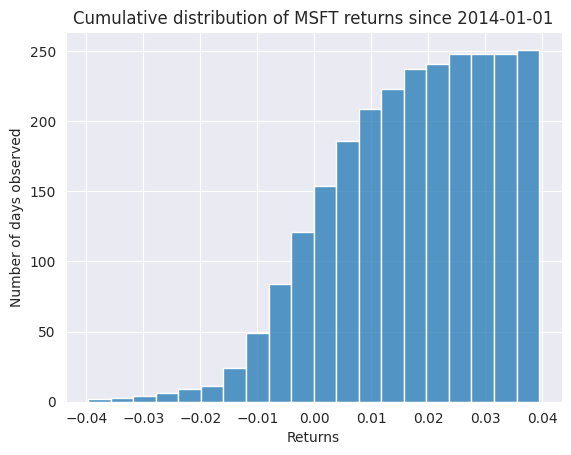

In [6]:
# remove the first element, since percent change from nothing is NaN
R = data['MSFT'].pct_change()[1:]

# plot a histogram using 20 bins
sb.histplot(R, bins=20, cumulative=True).set(title=f"Cumulative distribution of MSFT returns since {start_date}", xlabel="Returns", ylabel="Number of days observed");

### Scatter Plot

It's useful for visualizing the relationship between two data sets. We need data that is somehow related (such as the time of each value). Each point represents two corresponding values. However, we don't plot the date, but the prices.

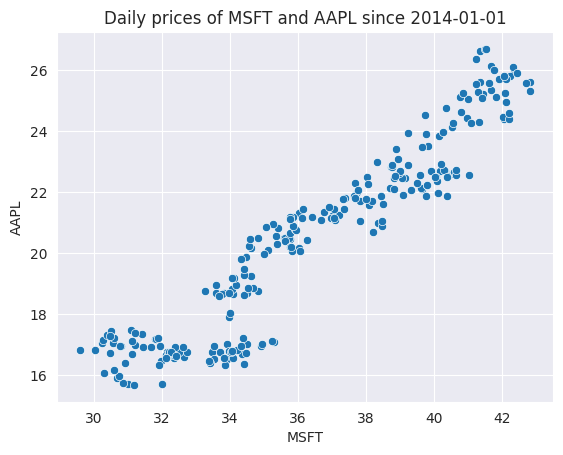

In [7]:
sb.scatterplot(x=data["MSFT"], y=data["AAPL"]).set(title=f"Daily prices of MSFT and AAPL since {start_date}");

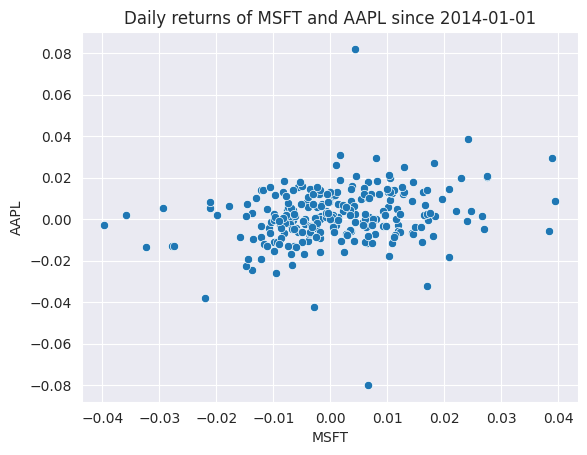

In [8]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

sb.scatterplot(x=R_msft, y=R_aapl).set(title=f"Daily returns of MSFT and AAPL since {start_date}");

### Line Graph

It can be used when we need to track the development of Y value as X changes.

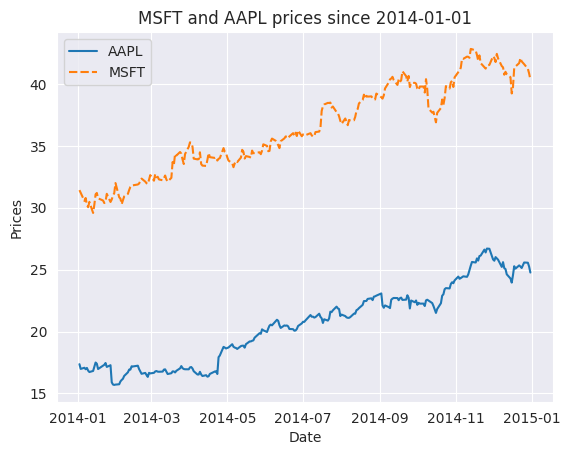

In [9]:
sb.lineplot(data=data).set(title=f"MSFT and AAPL prices since {start_date}", ylabel="Prices");

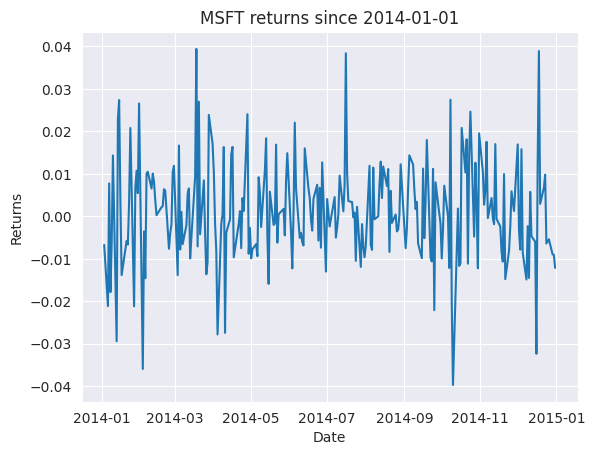

In [10]:
# remove the first element, since percent change from nothing is NaN
R = data['MSFT'].pct_change()[1:]

sb.lineplot(data=R).set(title=f"MSFT returns since {start_date}", ylabel="Returns");

## Never Assume Conditions Hold

When using plots to visualize data, don't assume you can test a hypothesis by looking at a graph. Don't assume because a distribution or trend used to be true, it's still true. In general much more validation is required to test whether models hold. Plots are only useful when deciding HOW models should work.